In [19]:
# Task 03
# Classification of cats and dogs using images

In [20]:
import os
import cv2
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns


In [21]:
IMG_SIZE = 64  # Resize image to 64x64
MAX_IMAGES_PER_CLASS = 1000  # To limit training time
DATASET_PATH = "D:/Intership/Prodigy/Cat vs Dog/dataset/train" 
print(os.listdir("D:/Intership/Prodigy/Cat vs Dog/dataset/train")[:10])


['cats', 'dogs']


In [22]:
def load_data(path, img_size, max_per_class):
    X, y = [], []
    cat_count = dog_count = 0

    # Check if path exists
    if not os.path.exists(path):
        raise FileNotFoundError(f"Dataset path does not exist: {path}")

    print("Loading and preprocessing images...")
    for class_name in ["cats", "dogs"]:
        class_path = os.path.join(path, class_name)
        if not os.path.exists(class_path):
            print(f"Error! Folder '{class_name}' not found!")
            continue
        for img_name in tqdm(os.listdir(class_path)):
            img_path = os.path.join(class_path, img_name)
            img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
            if img is None:
                print(f"Skipping unreadable image: {img_path}")
                continue
            try:
                img = cv2.resize(img, (img_size, img_size))
                X.append(img.flatten())  # Flatten image
                y.append(0 if class_name == "cats" else 1)  # Label: 0 = cat, 1 = dog
            except Exception as e:
                print(f"Error processing {img_name}: {e}")
                continue

    print(f"Loaded {len(X)} images (Cats: {cat_count}, Dogs: {dog_count})")

    if len(X) == 0 or len(y) == 0:
        raise ValueError("No images were loaded. Check dataset structure.")

    return np.array(X), np.array(y)

In [23]:
# Load data
X, y = load_data(DATASET_PATH, IMG_SIZE, MAX_IMAGES_PER_CLASS)

# Ensure correct shapes before splitting
if len(X) != len(y):
    raise ValueError(f"X and y sizes do not match! X: {len(X)}, y: {len(y)}")

Loading and preprocessing images...


100%|██████████| 10000/10000 [00:14<00:00, 693.08it/s]


Loaded 20000 images (Cats: 0, Dogs: 0)


In [24]:
# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"Train: {len(X_train)} | Test: {len(X_test)}")

Train: 16000 | Test: 4000


In [ ]:
from sklearn.decomposition import PCA
from sklearn.svm import LinearSVC

# Step 1: PCA
pca = PCA(n_components=100)
X_pca = pca.fit_transform(X)

# Step 2: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2)

# Step 3: Train faster SVM
model = LinearSVC(max_iter=5000)
model.fit(X_train, y_train)


LinearSVC(max_iter=5000)

In [ ]:
# Train Support Vector Machine (SVM)
model = SVC(kernel='rbf', cache_size=700, tol=1e-2)
model.fit(X_train, y_train)

SVC(cache_size=700, tol=0.01)

In [27]:
# Evaluate model
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")
print("\n Classification Report:\n")
print(classification_report(y_test, y_pred, target_names=['Cat', 'Dog']))

Accuracy: 66.35%

 Classification Report:

              precision    recall  f1-score   support

         Cat       0.68      0.65      0.66      2027
         Dog       0.65      0.68      0.67      1973

    accuracy                           0.66      4000
   macro avg       0.66      0.66      0.66      4000
weighted avg       0.66      0.66      0.66      4000



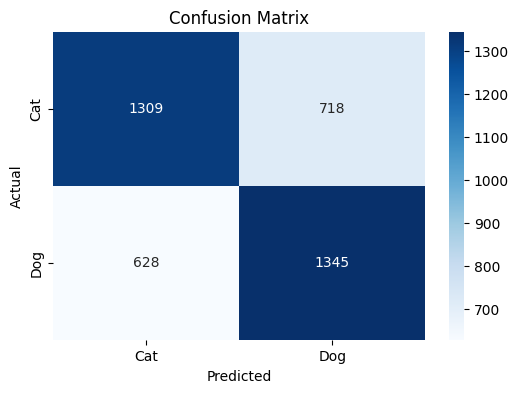

In [28]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Cat', 'Dog'], yticklabels=['Cat', 'Dog'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

Showing sample predictions...


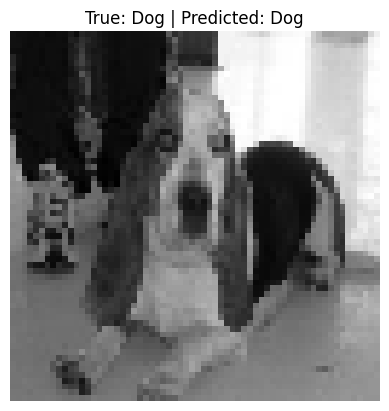

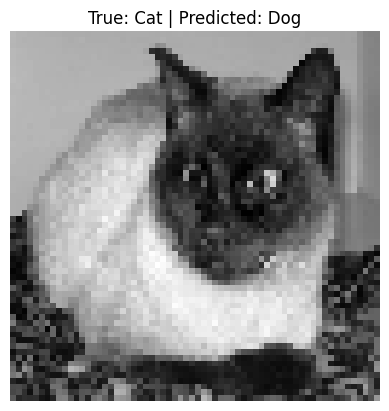

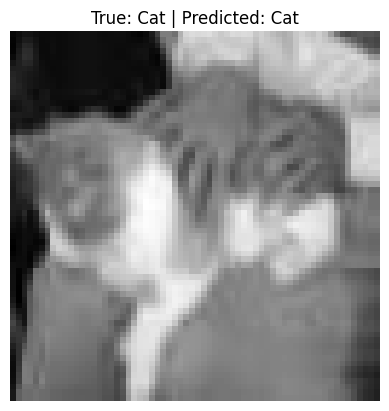

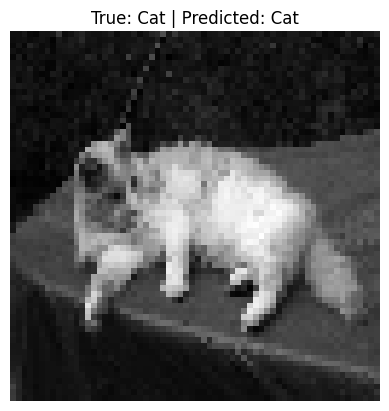

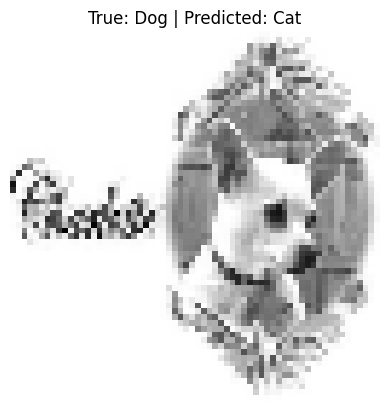

In [ ]:
# Keep the original for display
X_train_orig, X_test_orig, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply PCA to train/test
X_train = pca.fit_transform(X_train_orig)
X_test = pca.transform(X_test_orig)

# Train model on PCA-reduced data
model = LinearSVC(max_iter=5000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Now use X_test_orig for reshaping
def show_sample_predictions(X_data, y_true, y_pred, num=5):
    for i in range(num):
        img = X_data[i].reshape(IMG_SIZE, IMG_SIZE)
        true_label = "Dog" if y_true[i] == 1 else "Cat"
        predicted_label = "Dog" if y_pred[i] == 1 else "Cat"

        plt.imshow(img, cmap='gray')
        plt.title(f"True: {true_label} | Predicted: {predicted_label}")
        plt.axis('off')
        plt.show()

print("Showing sample predictions...")
show_sample_predictions(X_test_orig, y_test, y_pred)
